In [1]:
#Import libraries

In [2]:
import pandas as pd
import os

In [3]:
#Merging 12 months of sales into a single file

In [4]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')

In [5]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv('all_data.csv', index=False)

In [6]:
df = pd.read_csv('all_data.csv')

In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
#Additional columns

In [9]:
#Month column

In [10]:
df['Month'] = df['Order Date'].str[0:2]

In [11]:
#Add sales column

In [ ]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [82]:
#Add a city column

In [89]:
#Get state

In [14]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + get_state(x) + ')')

In [101]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [24]:
#Eliminating nans

In [26]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [32]:
#Find 'OR' and delete it

In [34]:
df = df[df['Order Date'].str[0:2] != 'Or']

In [39]:
#Convert columns to the correct type

In [35]:
df['Month'] = df['Month'].astype('int')

In [42]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [41]:
df['Price Each'] = df['Price Each'].astype(float)

In [36]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [61]:
#Reset index
df = df.reset_index(drop=True)
df = df.drop(columns=['index'])

In [62]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
#What was the best month for sales? How much money earned that month?

In [75]:
df.groupby('Month').sum()['Sales'].sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

In [76]:
results = df.groupby('Month').sum()

In [69]:
#Visualization

In [70]:
import matplotlib.pyplot as plt

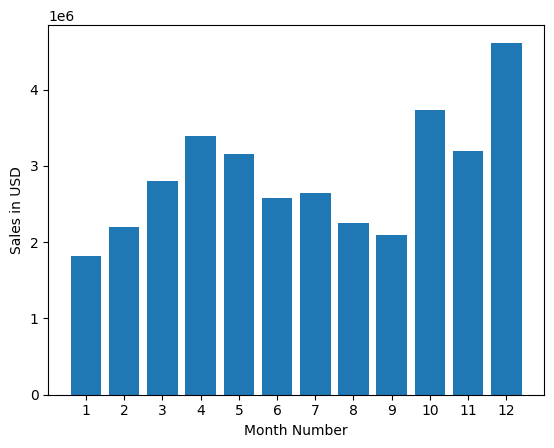

In [79]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

In [81]:
# What city has the highest number of sales?

In [102]:
df.groupby('City').sum()['Sales'].sort_values(ascending=False)

City
 San Francisco (CA)    8262203.91
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Boston (MA)           3661642.01
 Atlanta (GA)          2795498.58
 Dallas (TX)           2767975.40
 Seattle (WA)          2747755.48
 Portland (OR)         1870732.34
 Austin (TX)           1819581.75
 Portland (ME)          449758.27
Name: Sales, dtype: float64

In [109]:
#What time should we dispplay asvertisements to maximize likelihood of customer's buying product?

In [110]:
#Convert Order Date to correct data type

In [112]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [113]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [114]:
#Add another column
#Hour column and minute

In [115]:
df['Hour'] = df['Order Date'].dt.hour

In [117]:
df['Minute'] = df['Order Date'].dt.minute

In [118]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [119]:
#Plotting

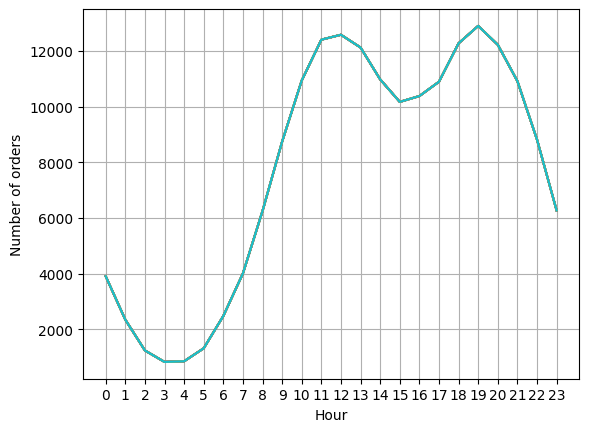

In [124]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [125]:
#What products are most often sold together

In [140]:
#Create a new Data Frame with only the duplicates

In [138]:
new_df = df[df['Order ID'].duplicated(keep=False)].copy()

In [141]:
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [143]:
new_df = new_df[['Order ID','Grouped']].drop_duplicates()

In [144]:
new_df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [145]:
from itertools import combinations
from collections import Counter

In [154]:
count = Counter()
for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [155]:
# What product sold the most and why doy you think it sold the most

In [161]:
product_group = df.groupby('Product')

In [168]:
product_group.count()['Quantity Ordered'].sort_values(ascending=False)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [169]:
#Plotting

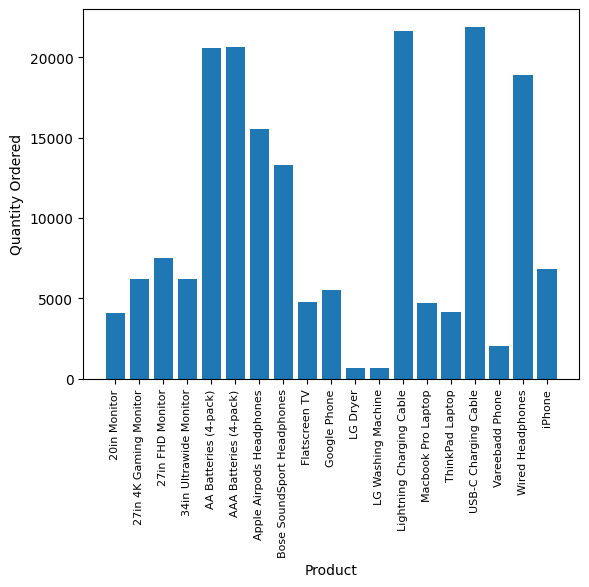

In [194]:
quantity_ordered = product_group.count()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()